# Elementary Probability Notions

## Sample space $\Omega$

> A _sample space_ is a set with elements describing the outcomes (also called elementary events) of the experiment in which we are interested.

Examples:
* Tossing a coin:
  $\Omega = \{Head, Tail\}$
* Number of bees in Europe: $\Omega = \mathbb{N}$
* Guessing the month when someone is born:
  $\Omega = \{Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec\}$
  
In Python, these can be represented simply as [sets](https://docs.python.org/3/library/stdtypes.html?highlight=set#set).

In [167]:
omega = set(['H', 'T'])
print('Omega:',omega)

Omega: {'T', 'H'}


_See: Exercise 1_

## Event $A \subseteq \Omega$

> An _event_ is a subset of the sample space.

Examples:
* The certain event: $\Omega$
* The impossible event: $\emptyset$
* Result of a coin toss: $A = \{Head\}$
* Knowing the someone is born in a summer month: $A=\{Jun, Jul, Aug\}$

### Operations

Generating a random event from a given sample space is effectively random sampling without replacement, so the `sample` function from the [random](https://docs.python.org/3/library/random.html) library can be used:

In [8]:
from random import sample
omega = set(range(10))
A = set(sample(omega, k=3))
B = set(sample(omega, k=5))
print("Omega:", omega)
print("A:", A)
print("B:",B)

Omega: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
A: {8, 3, 5}
B: {2, 4, 5, 7, 8}


Since events are sets, we can operate with events using the regular set operations: `union`, `intersection`, `difference`.

In [120]:
A = set([1, 2])
B = set([2, 3])
omega = set([1,2,3,4])
print(A.union(B))        # Or A|B
print(A.intersection(B)) # Or A&B
print(A.difference(B))   # Or A-B

{1, 2, 3}
{2}
{1}


We can visualise these operations using the [matplotlib_venn](https://pypi.org/project/matplotlib-venn/) library:

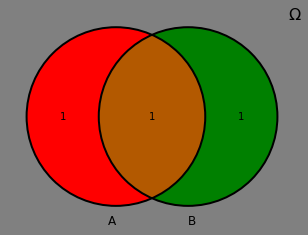

In [36]:
from tools.venn import A, B, omega, plot_venn
plot_venn(omega)

_See: Exercise 2, Exercise 3_

Events A and B are called _disjoint_ or _mutually exclusive_ if A and B have no outcomes in common. In set notation: $A \cap B = \emptyset$.

## Probability

> A _probability function_ $P$ on a finite sample space $\Omega$ assigns to  each event $A$ in $\Omega$ a number $P(A)$ in $[0,1]$ such that:
> 1. $P(\Omega)=1$ and
> 1. $P(A \cup B) = P(A)+P(B)$ if $A$ and $B$ are disjoint.

The number $P(A)$ is called the probability that $A$ occurs.

Consequently, if we have a finite space and all outcomes are equally likely:

$P(A) = \frac{\mbox{#favourable outcomes}}{\mbox{#all outcomes}} = \frac{|A|}{|\Omega|}$

Useful properties resulting from the definition:
1. $P(\emptyset) = 0$
1. $P(\neg A) = 1-P(A)$
1. $A \subseteq B \Rightarrow P(A) \leq P(B)$
1. $P(A \setminus B) = P(A) - P(A \cap B)$
1. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

### Example 1

What is the probability that a die will turn an odd number?

In [6]:
from tools.stats import probability

omega = set(range(1,7))
print('Omega:', omega)
A = set(a for a in omega if a % 2 == 0)
print('A:', A)
print('P(A):', probability(A, omega))

Omega: {1, 2, 3, 4, 5, 6}
A: {2, 4, 6}
P(A): 0.5


### Example 2

If not all outcomes are equally likely, we can use a weighted sum instead of simply counting the outcomes. The `probability_weighted` function does just that. 

If we have an unfair coin with a 75% chance of showing 'Head':

In [3]:
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    side: str
        
omega = set([Outcome(side='Head', weight=0.75), 
            Outcome(side='Tail', weight=0.25)])
A = set(o for o in omega if o.side is 'Head')
probability_weighted(A, omega)

0.75

## Products of sample spaces

Often in practice, more than one experiment is considered at a time. For instance, if we throw a coin two times, we would have two sample spaces $\Omega_2 = \Omega_1 = \{H, T\}$.

We can treat both trows as a single event with the sample space 

$\Omega = \Omega_1 \times \Omega_2 = \{(H,H), (H,T), (T,H), (T,T)\}$

or generally

$\Omega = \Omega_1 \times \Omega_2 = \{(\omega_1, \omega_2): \omega_1 \in \Omega_1, \omega_2 \in \Omega_2\}$

This corresonds to a cartesian product, so in Python it can be achieved throught the [product](https://docs.python.org/3/library/itertools.html#itertools.product) function:

In [11]:
from itertools import product
A = set(product(['a','b'], [1, 2]))
print(A)

{('b', 1), ('b', 2), ('a', 1), ('a', 2)}


### Example

What is the probability that by throwing a coin two times we will get tails at least once?

In [7]:
from itertools import product
from tools.stats import probability
omega_1=set(['H', 'T'])
omega_2=set(['H', 'T'])
omega=set(product(omega_1, omega_2))
print('Omega:', omega)
A = set(a for a in omega if 'T' in a)
print('A:', A)
print('P(A)=', probability(A, omega))

Omega: {('H', 'H'), ('H', 'T'), ('T', 'T'), ('T', 'H')}
A: {('H', 'T'), ('T', 'T'), ('T', 'H')}
P(A)= 0.75


## Conditional probabilities

> The _conditional probability of A given B_ is given by:
> 
> $P(A|B)= \frac{P(A\cap B)}{P(B)}$

Also called _posterior probability of A, given B_.

Useful properties resulting from the definition:
1. The multiplication rule:

  $P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)$ 
  
1. The chain rule:

  $P(A_1 \cap A_2 ... \cap A_n) = P(A_1)P(A_2|A_1)...P(A_n|A_1,A_2,...,A_{n-1})$
  
1. The law of total probability (for two events):

  $P(A) = P(A|B)P(B)+P(A| \neg B)P(\neg B)$
  
1. The law of total probability (for multiple events):

  $P(A) = P(A|B_1)P(B_1)+P(A|B_2)P(B_2)+...+P(A|B_n)P(B_n)$ where $B_1,...B_n$ are disjoint events such that $A \subseteq  B_1 \cup ... \cup B_n$

### Example

What is the probability that the current month has 31 days knowning that it's summer? We can model the problem using events like this:
* $\Omega$ is the sample spece of all months: $\Omega = \{Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec\}$
* $A$ is the event "month with 31 days": $A=\{Jan, Mar, May, Jul, Aug, Oct, Dec\}$
* $B$ is the event "month is a summer month": $B=\{Jun, Jul, Aug\}$
* We are interested in finding $P(A|B)$.

$P(A|B)= \frac{P(A\cap B)}{P(B)} = \frac{|\{Jul, Aug\}|}{|\{Jun, Jul, Aug\}|}=\frac{2}{3}$

Or, using Python and the `probability` function defined above:

In [38]:
from tools.stats import probability
omega = set(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
A = set(['Jan', 'Mar', 'May', 'Jul', 'Aug', 'Oct', 'Dec'])
B = set(['Jun', 'Jul', 'Aug'])
res1 = probability(A&B, omega) / probability(B, omega)
res2 = probability(A&B, B) # We can just repace omega with B
print(res1)
print(res2)

0.6666666666666666
0.6666666666666666


# Bayes' Theorem

![Bayes Theorem neon sign at HP Authonomy](img/Bayes_Theorem.jpg)

Bayes' theorem can be interpreted as linking the degree of belief in a proposition before and after accounting for evidence.

_See Exercise 11_

# Independent events

> An event A is called _independent of B_ if $P(A|B)=P(A)$

Useful properties:
1. Two events $A$ and $B$ are independent if $P(A \cap B) = P(A)P(B)$
1. Conditionally independent events: $P(A\cap B\ |\ C)=P(A|C)P(B|C)$